In [ ]:
Domain – Retail

focus – Optimize Book RENT

Business challenge/requirement

BookRent is the largest online and offline book rental chain in India. 
The Company charges a fixed fee per month plus rental per book. 
So, the company makes more money when user rent more books.
You as an ML expert have to model recommendation engine so that user gets recommendation of books based on the 
behavior of similar users. This will ensure that users are renting books based on their individual taste.
Company is still unprofitable and is looking to improve both revenue and profit.

Key issues
As of now lot users return book and do not take new rental. Right recommendation will entice user to rent more books

Considerations NONE

Data volume
- Approx 1 M records – file BX-Book-Ratings.csv and 2 more. But only 10K records will be used

Fields in Data
• user_id: Unique Id of the User
• isbn: International Standard Book Number is a unique numeric commercial
book identifier
• rating: rating given by user
Additional information - NA
      
Business benefits
Increase in both top line and bottom line as more rentals per user means more revenue and more profit

In [50]:
import pandas as pd

data1='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_11_Association_Rules_Mining_and_Recommendation_Systems/BX_books_book_ratings_users/BX-Book-Ratings.csv'

#data2='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_11_Association_Rules_Mining_and_Recommendation_Systems/BX_books_book_ratings_users/BX-Books.csv'

#data3='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_11_Association_Rules_Mining_and_Recommendation_Systems/BX_books_book_ratings_users/BX-Users.csv'


df_book_ratings=pd.read_csv(data1,encoding='latin1')

df_books=pd.read_csv(data2,encoding='latin1')

df_users=pd.read_csv(data3,encoding='latin1')


books=df_books
book_ratings=df_book_ratings
users=df_users


/Users/atul595525/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/atul595525/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
df_book_ratings.head(7)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0
6,276736,3257224281,8


In [52]:
df_books.head(8)

,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
5,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group
6,425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,Robert Cowley,2000,Berkley Publishing Group
7,671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks


In [53]:
df_users.head(8)

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN


In [54]:
df_book_ratings.count()

user_id    1048575
isbn       1048575
rating     1048575
dtype: int64

In [55]:
print(df_book_ratings.shape)
print(df_users.shape)
print(df_books.shape)

(1048575, 3)
(278859, 3)
(271379, 5)


In [56]:
df_books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [57]:
pd.set_option('display.max_colwidth',-1)

In [58]:
books.year_of_publication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [61]:
#DROPPIN THE VALUES WITH NON RELEVANAT YEAR OF PUBLICATION
books.drop(books.loc[books['year_of_publication']=='John Peterman'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='\\"Freedom Song\\""'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Frank Muir'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='ROBERT A. WILSON'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Karen T. Whittenburg'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='George H. Scherr'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Salvador de Madariaga'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Stan Berenstain'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Francine Pascal'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Luella Hill'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='John Alderson Foote'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='DK Publishing Inc'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Jules Janin'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Gallimard'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='&amp'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Learning"'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Isadora Duncan'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Beatrix Potter'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Bart Rulon'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Alan Rich'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Alan Rich'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='Alan Rich'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']==' Learning"'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']==' &amp'].index, inplace=True)
books.drop(books.loc[books['year_of_publication']=='K.C. Constantine'].index, inplace=True)





books.drop(books.loc[books['year_of_publication']=='0'].index, inplace=True)

In [62]:
books.year_of_publication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '1968', '1961', '1958', '1974',
       '1976', '1971', '1977', '1975', '1965', '1941', '1970', '1962',
       '1973', '1972', '1960', '1966', '1920', '1956', '1959', '1953',
       '1951', '1942', '1963', '1964', '1969', '1954', '1950', '1967',
       '2005', '1957', '1940', '1937', '1955', '1946', '1936', '1930',
       '2011', '1925', '1948', '1943', '1947', '1945', '1923', '2020',
       '1939', '1926', '1938', '2030', '1911', '1904', '1949', '1932',
       '1928', '1929', '1927', '1931', '1914', '2050', '1934', '1910',
       '1933', '1902', '1924', '1921', '1900', '2038', '2026', '1944',
       '1917', '1901', '2010', '1908', '1906', '1935', '1806', '2021',
       '2012', '2006', '1909', '2008', '1378', '1919', '1922', '1897',
      

In [63]:
#cOVERTING STRING VALUE TO NUMERIC VALUE
books.year_of_publication=pd.to_numeric(books.year_of_publication,errors='coerce')

In [64]:
print(sorted(books.year_of_publication.unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [65]:
import numpy as np
books.loc[(books.year_of_publication >2020) | (books.year_of_publication==0),'year_of_publication']=np.nan


In [66]:
books.year_of_publication.fillna(round(books.year_of_publication.mean()),inplace=True)

In [67]:
books.year_of_publication=books.year_of_publication.astype(np.int32)

In [68]:
books.loc[books.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [ ]:
#I have handled two NaN values by replacing them with ‘other’ as publisher name could 
#not be inferred after some investigations

In [69]:
books.loc[(books.isbn =='193169656X'),'publisher']='other'

In [70]:
books.loc[(books.isbn =='1931696993'),'publisher']='other'

In [71]:
books.loc[books.publisher.isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher


In [72]:
users.shape

(278859, 3)

In [73]:
users.head(7)

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN


In [77]:
users.dtypes

user_id     object 
Location    object 
Age         float64
dtype: object

In [78]:
print(sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [ ]:
#Upon checking the unique values, userID looks correct. However, Age column has a NaN and some very high values. 
#In my view ages below 5 and above 90 do not make much sense, and hence, these are being replaced with NaNs. 
#All the NaNs are then replaced with mean value of Age, and its data type is set as int.

In [79]:
import numpy as np
users.loc[(users.Age >90) | (users.Age < 5),'Age']=np.nan
users.Age=users.Age.fillna(users.Age.mean())
users.Age=users.Age.astype(np.int32)


In [80]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


In [81]:
users.head(7)

,user_id,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
5,6,"santa monica, california, usa",61
6,7,"washington, dc, usa",34


In [83]:
book_ratings.shape

(1048575, 3)

In [85]:
#We check the ratings dataset for its shape and first few rows. 
#It reveals that our user-book ratings matrix will be very sparse as actual ratings are quite less as 
#compared to size of ratings matrix (number of users × number of books).

book_ratings.head(6)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0


In [88]:
n_users = users.shape[0]

n_books=books.shape[0]

print(n_users*n_books)

74424678510


In [ ]:
#Now ratings dataset should have userID and ISBN which exist in 
#respective tables, viz. users and books.

In [89]:
ratings_new=book_ratings[book_ratings.isbn.isin(books.isbn)]
ratings_new=ratings_new[ratings_new.user_id.isin(users.user_id)]


In [90]:
print(book_ratings.shape)
print(ratings_new.shape)

(1048575, 3)
(920162, 3)


In [91]:
sparsity=1.0-len(ratings_new)/float(n_users*n_books)

print(sparsity)

0.9999876363322164


In [92]:
#The explicit ratings represented by 1–10 and implicit ratings represented by 0 will have to be segregated now. 
#We will be using only explicit ratings for building our book recommendation system. Similarly, 
#users are also segregated into those who rated explicitly and those whose implicit behavior was recorded.


In [93]:
book_ratings.columns

Index(['user_id', 'isbn', 'rating'], dtype='object')

In [94]:
book_ratings.rating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [95]:
ratings_explicit=ratings_new[ratings_new.rating !=0]
ratings_implicit=ratings_new[ratings_new.rating ==0]

In [96]:
users_exp_ratings=users[users.user_id.isin(ratings_explicit.user_id)]
users_imp_ratings=users[users.user_id.isin(ratings_implicit.user_id)]

In [98]:
#A countplot of bookRating indicates that higher ratings are more common 
#amongst users and rating 8 has been rated highest number of times.


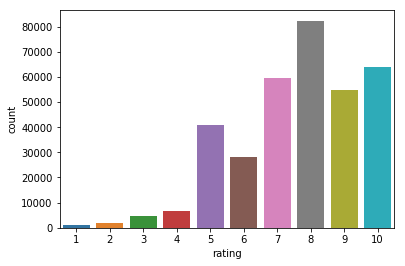

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=ratings_explicit,x='rating')

plt.show()

In [105]:
#Simple Popularity based Recommendation System
#At this point, a simple popularity based recommendation system can be built based on count of user ratings 
#for different books. 


In [106]:
ratings_explicit.columns

Index(['user_id', 'isbn', 'rating'], dtype='object')

In [107]:
ratings_counts=pd.DataFrame(ratings_explicit.groupby(['isbn'])['rating'].sum())
top10=ratings_counts.sort_values('rating',ascending=False).head(10)

print("following are recommeded")

top10.merge(books,left_index=True,right_on='isbn')

following are recommeded


,rating,isbn,book_title,book_author,year_of_publication,publisher
408,5165,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,3798,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
522,2864,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
2143,2528,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
356,2378,142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
26,2326,971880107,Wild Animus,Rich Shapero,2004,Too Far
1105,2292,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
706,2129,446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,1998,Warner Books
118,2015,671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star
231,2006,452282152,Girl with a Pearl Earring,Tracy Chevalier,2001,Plume Books


In [109]:
#checking shapes
print(users.shape)
print(users_exp_ratings.shape)
print(users_imp_ratings.shape)


(278859, 3)
(60431, 3)
(46486, 3)


In [ ]:
#Collaborative Filtering Based Recommendation Systems

In [110]:
ratings_explicit.keys()

Index(['user_id', 'isbn', 'rating'], dtype='object')

In [111]:
#To cope up with computing power I have and to reduce the dataset size, I am considering users who have rated atleast 100 books
#and books which have atleast 100 ratings
counts1 = ratings_explicit['user_id'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(counts1[counts1 >= 100].index)]
counts = ratings_explicit['rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['rating'].isin(counts[counts >= 100].index)]

In [115]:
np.where(ratings_explicit.index.duplicated())

(array([], dtype=int64),)

In [118]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = ratings_explicit.pivot(index='user_id', columns='isbn', values='rating')
user_id = ratings_matrix.index
isbn = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
#Notice that most of the values are NaN (undefined) implying absence of ratings


ValueError: Index contains duplicate entries, cannot reshape